In [18]:
import pickle
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
#from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn import cross_validation
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [3]:
#Loading all the pickles files generated during preprocessing!!!
#1.loading avgW2Vec files:-
with open('test_avgw2v.pkl', 'rb') as f:
       test_avgw2v = pickle.load(f)
with open('train_avgw2v.pkl', 'rb') as f:
        train_avgw2v = pickle.load(f)

#2. loading tfidf files:-
with open('testtfidf.pkl', 'rb') as f:
        testtfidf = pickle.load(f)
with open('traintfidf.pkl', 'rb') as f:
        traintfidf = pickle.load(f)

#3. loading Bow files:-
with open('testbow.pkl', 'rb') as f:
        testbow = pickle.load(f)
with open('trainbow.pkl', 'rb') as f:
        trainbow = pickle.load(f)


In [4]:
#loading test train dataframe:-
with open('traindf.pkl', 'rb') as f:
        train_df = pickle.load(f)
with open('testdf.pkl', 'rb') as f:
        test_df = pickle.load(f)


# Applying Knn Brute Force:-

1.Applying knn Brute Force on Bow:-

In [6]:
print("Number of training points "+str(trainbow.shape[0]))
print("Number of test points "+str(testbow.shape[0]))


Number of training points 28000
Number of test points 12000


In [23]:
def brute_knn_classifier(X,Y):
    neighbors = [i for i in range(1,150,5)]
    cv_scores = []
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k, algorithm = "brute")
        scores = cross_val_score(knn,X,Y,cv = 10,scoring = 'roc_auc')
        cv_scores.append(scores.mean())
    #MSE = [1 - x for x in cv_scores]
    optimal_k = neighbors[cv_scores.index(max(cv_scores))]
    print("Optimal number of neighbor is"+" "+str(optimal_k))
    plt.plot(neighbors,cv_scores)
    for xy in zip(neighbors, np.round(cv_scores,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.title("auc vs K")
    plt.xlabel('Number of neighbors K')
    plt.ylabel('auc')
    plt.show()

    print("the auc for each k value is : ", np.round(cv_scores,3))
    return optimal_k


        

Optimal number of neighbor is 146


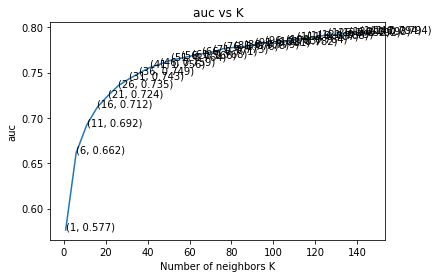

the auc for each k value is :  [0.577 0.662 0.692 0.712 0.724 0.735 0.743 0.749 0.756 0.759 0.764 0.766
 0.768 0.771 0.773 0.776 0.778 0.779 0.781 0.783 0.782 0.784 0.787 0.788
 0.79  0.792 0.792 0.793 0.794 0.794]


In [24]:
optimal_k = brute_knn_classifier(trainbow,train_df["Score"])

In [25]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k,algorithm = "brute")

# fitting the model
knn_optimal.fit(trainbow, train_df["Score"])
#knn_optimal.fit(bow_data, y_train)

# predict the response
pred = knn_optimal.predict(testbow)



In [46]:
y_proabs = knn_optimal.predict_proba(testbow)

In [47]:
auc_score = roc_auc_score(test_df["Score"],y_proabs[:,1])
print("The auc score on test data is ",auc_score)

The auc score on test data is  0.7850037312712134


In [27]:
import scikitplot as skplt
import matplotlib.pyplot as plt
#referenced from : -https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

# ROC curve for test data:-

In [32]:
y_proabs_train = knn_optimal.predict_proba(trainbow)

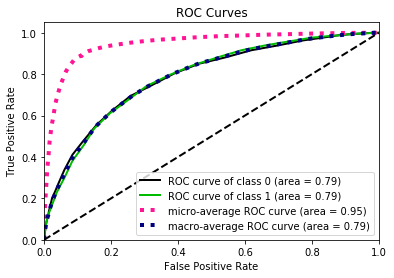

In [48]:
skplt.metrics.plot_roc_curve(test_df["Score"], y_proabs)
plt.show()

# ROC curve on train data:-

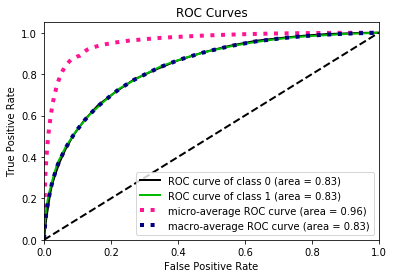

In [49]:
skplt.metrics.plot_roc_curve(train_df["Score"], y_proabs_train)
plt.show()

In [50]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(test_df["Score"], pred)
print(c_matrix)

[[    1  1334]
 [    0 10665]]


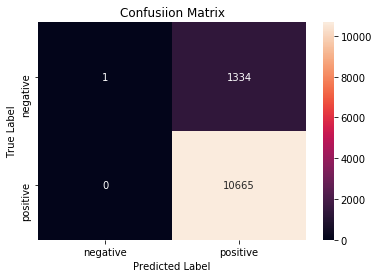

In [51]:
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(c_matrix, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()